<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/TikTok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords 
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tiktok_google_play_reviews.csv')
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...,MR LOL GAMER,https://play-lh.googleusercontent.com/a/AATXAJ...,Good,5,0,23.8.4,2022-04-05 23:18:30,NaN,NaN
1,gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...,Dino Kljako,https://play-lh.googleusercontent.com/a-/AOh14...,Awesome app! Too many people on it where it's ...,5,0,NaN,2022-04-05 23:18:21,NaN,NaN
2,gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...,Olivia Harding,https://play-lh.googleusercontent.com/a/AATXAJ...,Not bad,5,0,23.9.5,2022-04-05 23:17:34,NaN,NaN
3,gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...,Keli We,https://play-lh.googleusercontent.com/a-/AOh14...,It is good,2,0,22.2.5,2022-04-05 23:17:04,NaN,NaN
4,gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...,Mavis Kotoka,https://play-lh.googleusercontent.com/a/AATXAJ...,Very interesting app,5,0,22.1.5,2022-04-05 23:17:04,NaN,NaN


In [ ]:
data = data[["content", "score"]]
data.head()

,content,score
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5


In [ ]:
data.isnull().sum()

content    4
score      0
dtype: int64

In [ ]:
data.dropna()

,content,score
0,Good,5
1,Awesome app! Too many people on it where it's ...,5
2,Not bad,5
3,It is good,2
4,Very interesting app,5
...,...,...
307052,"Best app ever let's do it ,very awesome let ev...",5
307053,I LOVE TIKTOK,5
307054,The videos are amazing...such an amazing app,5
307055,Nice app,5


In [ ]:
stopword = set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data['content'] = data['content'].apply(clean)

In [ ]:
ratings = data['score'].value_counts()
numbers = ratings.index
quantity = ratings.values
figure = px.pie(data,values=quantity,
                names=numbers, hole=0.5)
figure.show()

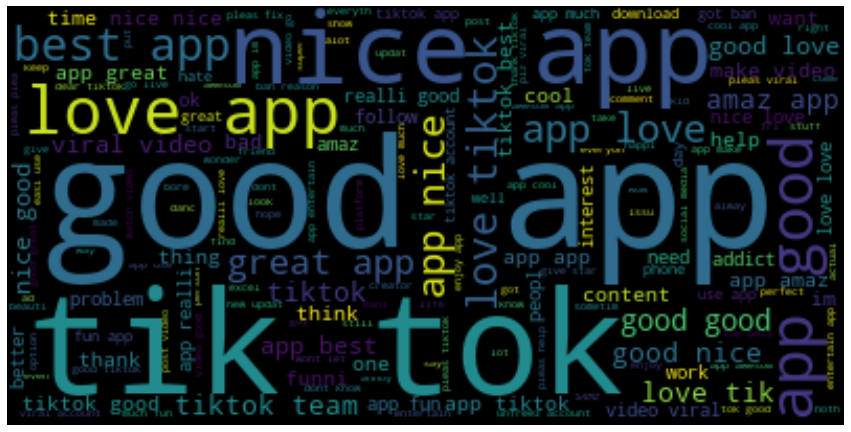

In [ ]:
text = " ".join(i for i in data.content)
stopswords = set(STOPWORDS)
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)["pos"] for i in data['content']]
data['Negative'] = [sentiments.polarity_scores(i)["neg"] for i in data['content']]
data['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i in data['content']]
data = data[['content','Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,content,Positive,Negative,Neutral
0,good,1.000,0.0,0.000
1,awesom app mani peopl easier fb girl awesom gu...,0.381,0.0,0.619
2,bad,0.000,1.0,0.000
3,good,1.000,0.0,0.000
4,interest app,0.750,0.0,0.250


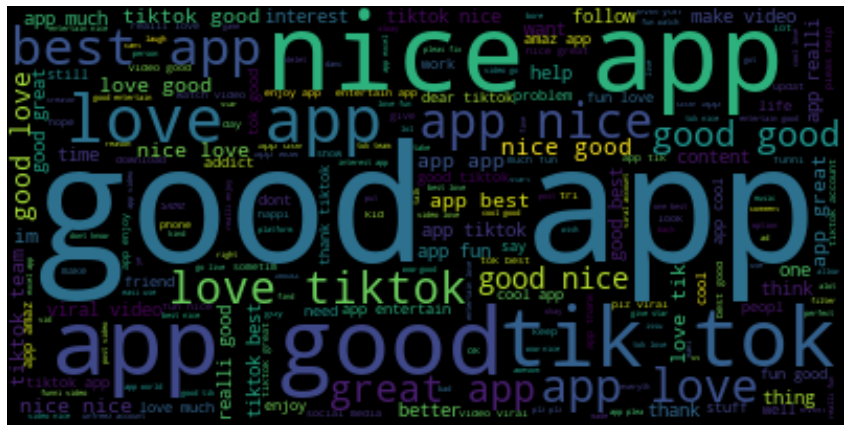

In [ ]:
positive = ' '.join([i for i in data['content'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

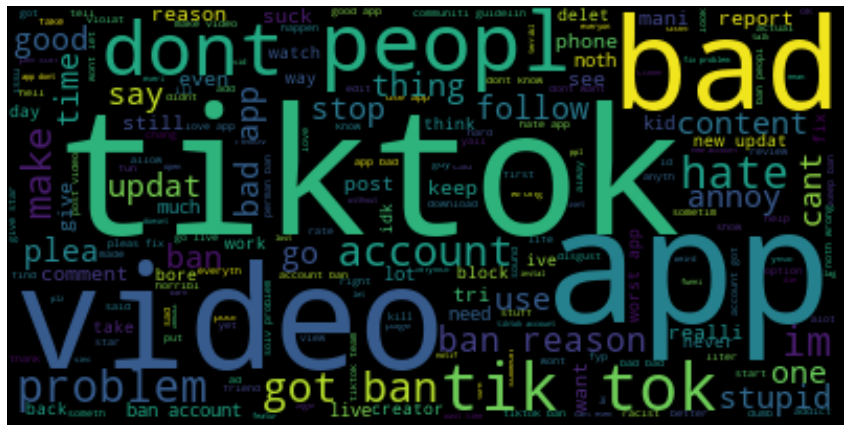

In [ ]:
negative = ' '.join([i for i in data['content'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("Off")
plt.show()